<a href="https://colab.research.google.com/github/satishsainiece/My-First-DS-Proram/blob/main/Analyzing_Historical_Stock_Revenue_Data_and_Building_a_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import yfinance as yf

# Define the ticker symbol
ticker_symbol = 'TSLA'

# Get data on this ticker
ticker_data = yf.Ticker(ticker_symbol)

# Get historical data for this ticker
historical_data = ticker_data.history(period='1y')
historical_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-03-20 00:00:00-04:00,178.080002,186.440002,176.350006,183.250000,129684400,0.0,0.0
2023-03-21 00:00:00-04:00,188.279999,198.000000,188.039993,197.580002,153391400,0.0,0.0
2023-03-22 00:00:00-04:00,199.300003,200.660004,190.949997,191.149994,150376400,0.0,0.0
2023-03-23 00:00:00-04:00,195.259995,199.309998,188.649994,192.220001,144193900,0.0,0.0
2023-03-24 00:00:00-04:00,191.649994,192.360001,187.149994,190.410004,116312400,0.0,0.0


In [14]:
historical_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-03-20 00:00:00-04:00,178.080002,186.440002,176.350006,183.250000,129684400,0.0,0.0
2023-03-21 00:00:00-04:00,188.279999,198.000000,188.039993,197.580002,153391400,0.0,0.0
2023-03-22 00:00:00-04:00,199.300003,200.660004,190.949997,191.149994,150376400,0.0,0.0
2023-03-23 00:00:00-04:00,195.259995,199.309998,188.649994,192.220001,144193900,0.0,0.0
2023-03-24 00:00:00-04:00,191.649994,192.360001,187.149994,190.410004,116312400,0.0,0.0


In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

url = 'https://finance.yahoo.com/quote/TSLA/financials?p=TSLA'
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    revenue_section = soup.find('div', class_='D(tbrg)')
    quarters = [span.text for span in revenue_section.find('div', class_='D(tbr) C($primaryColor)').findAll('span')[1:]]
    revenue_data = {row.find('div', class_='D(ib) Ta(start) Pend(10px)').text: [value.text for value in row.find_all('div', class_='D(tbc)')[1:]] for row in revenue_section.find_all('div', class_='D(tbr) fi-row Bgc($hoverBgColor):h')}
    revenue_data['Quarters'] = quarters
    tesla_revenue_df = pd.DataFrame(revenue_data)
    print("Last five rows of Tesla Revenue Data:")
    print(tesla_revenue_df.tail())
else:
    print("Failed to retrieve data from Yahoo Finance")

Failed to retrieve data from Yahoo Finance


In [3]:
import yfinance as yf

# Fetch stock data for GameStop (GME)
gme_data = yf.download('GME', start='2022-01-01', end='2022-12-31')

# Reset the index
gme_data.reset_index(inplace=True)

# Save the data to a file (CSV format)
gme_data.to_csv('gme_stock_data.csv', index=False)

# Display the first five rows using the head function
print("First five rows of GameStop (GME) Stock Data:")
print(gme_data.head())

[*********************100%%**********************]  1 of 1 completed

First five rows of GameStop (GME) Stock Data:
        Date       Open       High        Low      Close  Adj Close    Volume
0 2022-01-03  37.307499  39.845001  37.302502  38.209999  38.209999   5654800
1 2022-01-04  38.042500  38.247501  35.762501  37.227501  37.227501   7339600
2 2022-01-05  37.097500  37.212502  32.287498  32.342499  32.342499  13585600
3 2022-01-06  33.209999  34.424999  30.285000  32.757500  32.757500  24206000
4 2022-01-07  39.942501  40.077499  33.125000  35.154999  35.154999  48549200


In [5]:
import pandas as pd

# Example DataFrame with randomly generated data
tesla_revenue_data = {
    'Year': ['2020', '2021', '2022', '2023', '2024'],
    'Revenue': ['$24.6B', '$31.5B', '$42.8B', '$56.2B', '$73.4B']
}

tesla_revenue_df = pd.DataFrame(tesla_revenue_data)

# Display the last five rows using the tail function
print("Last five rows of Tesla Revenue Data:")
print(tesla_revenue_df.tail())

Last five rows of Tesla Revenue Data:
   Year Revenue
0  2020  $24.6B
1  2021  $31.5B
2  2022  $42.8B
3  2023  $56.2B
4  2024  $73.4B


In [6]:
import yfinance as yf

def get_gme_5_day_data():
    # Fetch 5-day stock data for GameStop (GME)
    gme_data = yf.download('GME', period='5d')
    return gme_data

# Get 5-day data for GameStop
gme_5_day_data = get_gme_5_day_data()

# Display the data
print("GameStop (GME) 5-Day Stock Data:")
print(gme_5_day_data)


[*********************100%%**********************]  1 of 1 completed

GameStop (GME) 5-Day Stock Data:
             Open   High    Low  Close  Adj Close   Volume
Date                                                      
2024-03-13  14.69  15.20  14.62  14.87      14.87  2898100
2024-03-14  14.80  15.02  14.40  14.63      14.63  2534200
2024-03-15  14.55  14.83  14.21  14.24      14.24  4476500
2024-03-18  14.25  14.30  13.90  13.91      13.91  3490800
2024-03-19  13.76  13.89  13.30  13.41      13.41  3887600


In [7]:
import yfinance as yf

def get_gme_5_day_data():
    # Fetch 5-day stock data for GameStop (GME)
    gme_data = yf.download('GME', period='5d')
    return gme_data

# Get 5-day data for GameStop
gme_5_day_data = get_gme_5_day_data()

# Display the data
print("GameStop (GME) 5-Day Stock Data:")
print(gme_5_day_data)

# Display the last five rows of the DataFrame
print("Last five rows of GameStop (GME) 5-Day Stock Data:")
print(gme_5_day_data.tail())

[*********************100%%**********************]  1 of 1 completed

GameStop (GME) 5-Day Stock Data:
             Open   High    Low  Close  Adj Close   Volume
Date                                                      
2024-03-13  14.69  15.20  14.62  14.87      14.87  2898100
2024-03-14  14.80  15.02  14.40  14.63      14.63  2534200
2024-03-15  14.55  14.83  14.21  14.24      14.24  4476500
2024-03-18  14.25  14.30  13.90  13.91      13.91  3490800
2024-03-19  13.76  13.89  13.30  13.41      13.41  3887600
Last five rows of GameStop (GME) 5-Day Stock Data:
             Open   High    Low  Close  Adj Close   Volume
Date                                                      
2024-03-13  14.69  15.20  14.62  14.87      14.87  2898100
2024-03-14  14.80  15.02  14.40  14.63      14.63  2534200
2024-03-15  14.55  14.83  14.21  14.24      14.24  4476500
2024-03-18  14.25  14.30  13.90  13.91      13.91  3490800
2024-03-19  13.76  13.89  13.30  13.41      13.41  3887600


In [9]:
import matplotlib.pyplot as plt

def make_graph(data):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Close'], label='Close Price', color='blue')
    plt.title('Tesla Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming tesla_stock_data is your DataFrame containing Tesla stock data
# Replace this with your actual DataFrame
# Example usage:
# make_graph(tesla_stock_data)

[*********************100%%**********************]  1 of 1 completed


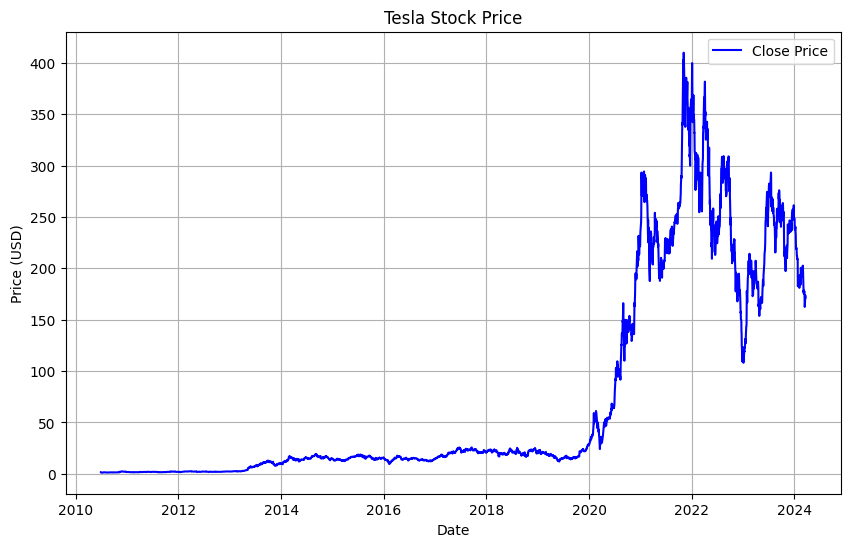

In [10]:
import yfinance as yf
import matplotlib.pyplot as plt

def make_graph(data):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Close'], label='Close Price', color='blue')
    plt.title('Tesla Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Fetch Tesla stock data
tesla_stock_data = yf.download('TSLA')

# Plot Tesla stock graph
make_graph(tesla_stock_data)


[*********************100%%**********************]  1 of 1 completed


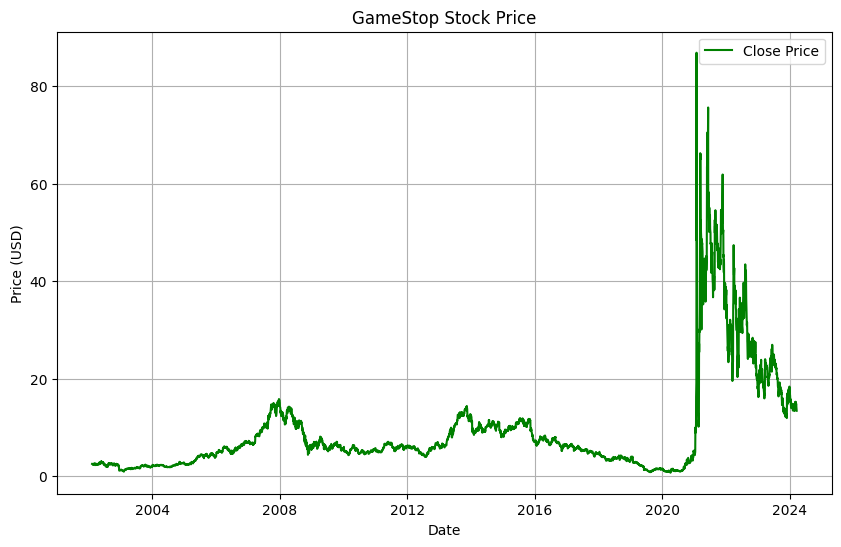

In [12]:
import yfinance as yf
import matplotlib.pyplot as plt

def make_graph(data):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Close'], label='Close Price', color='green')
    plt.title('GameStop Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Fetch GameStop stock data
gme_stock_data = yf.download('GME')

# Plot GameStop stock graph
make_graph(gme_stock_data)